In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import datetime as dt
import string

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")
sns.set(font_scale=2)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 15000)
pd.set_option('display.max_colwidth', -1)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

/Users/abbieschindler/opt/anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


## Get data

### Get filtered drinking data combined with RFID (already processed in other nb)

In [2]:
#create list of dir paths
path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/MP/comb'
    
path_file_names = os.listdir(path)

data_paths = []

for file in path_file_names:
    int_path = path + '/' + file
    data_paths.append(int_path)
    
data_paths

['/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/MP/comb/etoh_r1.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/MP/comb/etoh_r2.csv']

In [3]:
data_comb = pd.DataFrame()

for path in data_paths:
    print(path)
    
    if path.split('/')[-1] == '.DS_Store':
        continue
    
    data_int = pd.read_csv(path)
    data_int = pd.DataFrame(data = data_int)
    data_int['round'] = path.split('/')[-1]

    if data_comb.shape[0] == 0:
        data_comb = data_int
    else:
        data_comb = pd.concat([data_comb, data_int], axis=0)
        
    print(data_comb.shape)
    
data_comb.head()

/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/MP/comb/etoh_r1.csv
(52500, 54)
/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/MP/comb/etoh_r2.csv
(103364, 54)


,Unnamed: 0,Round,Build,Startdate,Timepoint,Cage,IdRFID,Animal,ARF_Cage,Injury,Sex,Cage_N,22_11_11,22_11_18,22_11_25,22_12_02,23_01_06,23_01_13,23_01_20,23_01_27,index,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,VDM_drink,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,ld_cycle,ld_day,alcohol_on,after_weekend,VDM_RFID_timediff,VDM_RFID_timediff_bool,min_count,sec_count,hour_count_running,min_count_running,sec_count_running,substance,round
0,0,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,1,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 19:51:51,drink_4,0.021,2022-11-11 19:51:51,1.668196e+09,2022-11-11,11,19:51:51,19,51,51,dark_pm,etoh_02,8.770,041ABFF7BC,etoh_02,2022-11-11 19:51:44.387020800,2022-11-11 19:51:53.157020800,dark,1.0,yes,0.0,0.000000,same,1191,71511,19.0,1191.0,71451.0,etoh_02,etoh_r1.csv
1,1,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,5,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 21:15:56,drink_4,0.021,2022-11-11 21:15:56,1.668201e+09,2022-11-11,11,21:15:56,21,15,56,dark_pm,etoh_02,3.592,041ABFF7BC,etoh_02,2022-11-11 21:14:55.025030400,2022-11-11 21:14:58.617030400,dark,1.0,yes,0.0,57.382969,diff,1275,76556,21.0,1275.0,76496.0,etoh_02,etoh_r1.csv
2,2,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,19,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 21:46:35,drink_4,0.021,2022-11-11 21:46:35,1.668203e+09,2022-11-11,11,21:46:35,21,46,35,dark_pm,etoh_02,0.075,041ABFF7BC,etoh_02,2022-11-11 21:46:33.672979200,2022-11-11 21:46:33.747979200,dark,1.0,yes,0.0,1.252020,diff,1306,78395,21.0,1306.0,78335.0,etoh_02,etoh_r1.csv
3,3,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,20,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 21:46:38,drink_4,0.021,2022-11-11 21:46:38,1.668203e+09,2022-11-11,11,21:46:38,21,46,38,dark_pm,etoh_02,0.075,041ABFF7BC,etoh_02,2022-11-11 21:46:33.672979200,2022-11-11 21:46:33.747979200,dark,1.0,yes,0.0,4.252020,diff,1306,78398,21.0,1306.0,78338.0,etoh_02,etoh_r1.csv
4,4,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,97,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 23:12:05,drink_4,0.021,2022-11-11 23:12:05,1.668208e+09,2022-11-11,11,23:12:05,23,12,5,dark_pm,etoh_02,0.075,041ABFF7BC,etoh_02,2022-11-11 23:12:00.096019200,2022-11-11 23:12:00.171019200,dark,1.0,yes,0.0,4.828980,diff,1392,83525,23.0,1392.0,83465.0,etoh_02,etoh_r1.csv


In [4]:
data_comb['VDM_file'].value_counts()

w_e10_e20_e05_MPc1_230106.csv     15644
w_e05_e10_e2.5_MPc1_221118.csv    13262
w_e05_e10_e2.5_MPc1_221125.csv    13177
w_e10_e20_e05_MPc1_230120.csv     11937
w_e10_e20_e05_MPc1_230113.csv     11809
e05_e10_e2.5_w_MPc1_221204.csv    9317 
w_e10_e20_e05_MPc1_230129.csv     8358 
w_e05_e10_e2.5_MPc1_221114.csv    7912 
w_e05_e10_e2.5_MPc1_221111.csv    5236 
w_e05_e10_e2.5_MPc1_221202.csv    3596 
w_e10_e20_e05_MPc1_230127.csv     3116 
Name: VDM_file, dtype: int64

#### Check for incomplete VDM data

In [5]:
d = data_comb[data_comb['VDM_RFID_timediff']<3]
d = d[d['alcohol_on']=='yes']

VDM_count = d.groupby(['round', 'ld_day', 'Cage', 'substance'])['value'].sum().reset_index(name='count')

VDM_count.head()

,round,ld_day,Cage,substance,count
0,etoh_r1.csv,1.0,1,etoh_02,2.814
1,etoh_r1.csv,1.0,1,etoh_05,1.218
2,etoh_r1.csv,1.0,1,etoh_10,0.105
3,etoh_r1.csv,1.0,1,water,1.281
4,etoh_r1.csv,1.0,2,etoh_02,6.405


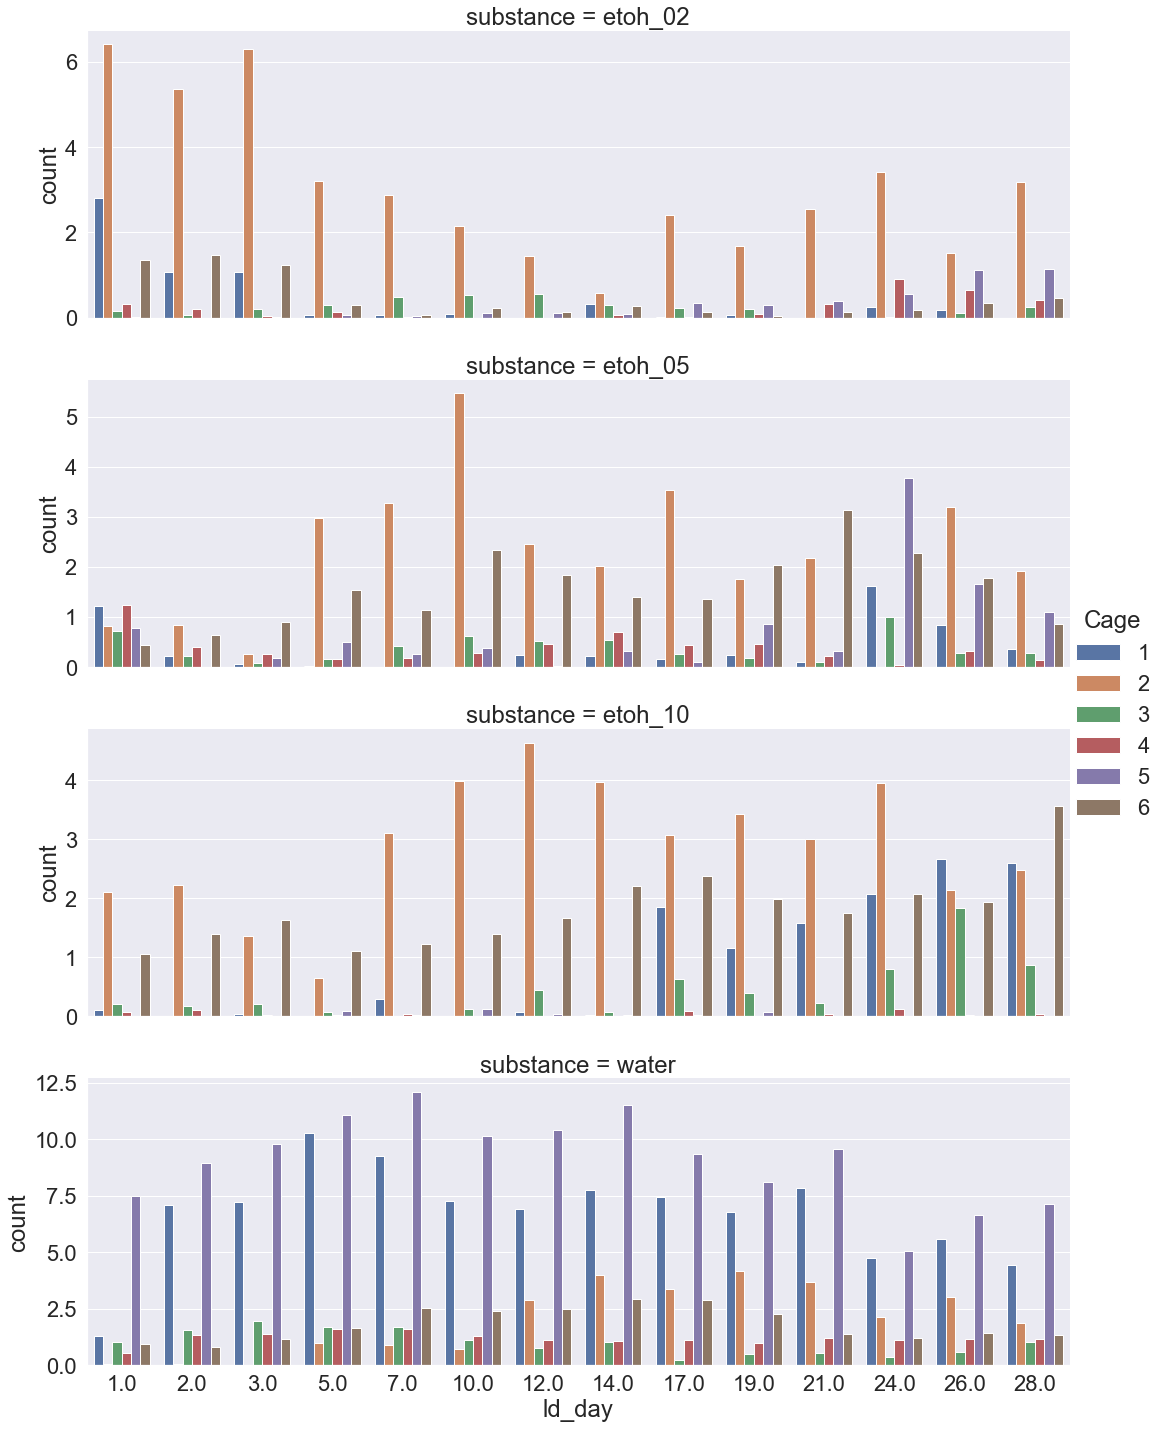

In [6]:
d = VDM_count[VDM_count['round']=='etoh_r1.csv']

sns.catplot(x='ld_day', y='count', hue='Cage', data=d, kind='bar', height=5, aspect=3, 
            col='substance', col_wrap=1, sharey=False)

### Get RFID data (already processed in other nb)

In [7]:
#create list of dir paths
path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/MP/RFID/comb'
    
path_file_names = os.listdir(path)

data_paths = []

for file in path_file_names:
    int_path = path + '/' + file
    data_paths.append(int_path)
    
data_paths

['/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/MP/RFID/comb/RFID_r1.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/MP/RFID/comb/RFID_r2.csv']

In [8]:
data_RFID = pd.DataFrame()

for path in data_paths:
    print(path)
    
    if path.split('/')[-1] == '.DS_Store':
        continue
    
    data_int = pd.read_csv(path)
    data_int = pd.DataFrame(data = data_int)
    data_int['round'] = path.split('/')[-1]

    if data_RFID.shape[0] == 0:
        data_RFID = data_int
    else:
        data_RFID = pd.concat([data_RFID, data_int], axis=0)
        
    print(data_RFID.shape)
    
data_RFID.head()

/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/MP/RFID/comb/RFID_r1.csv
(347704, 39)
/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/MP/RFID/comb/RFID_r2.csv
(633422, 39)


,Unnamed: 0,Round,Timepoint,Cage,IdRFID,Animal,Injury,Sex,Cage_N,unitLabel_drink,unitLabel,eventDuration,ld_cycle,ld_day,day,alcohol_on,after_weekend,RFID_hour,RFID_min,RFID_second,RFID_datetime_start,RFID_datetime_end,RFID_time_start,RFID_time_end,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running,RFID_file,22_11_11,22_11_18,22_11_25,22_12_02,23_01_06,23_01_13,23_01_20,23_01_27,round
0,0,MPc1,1m,1,041ABFF7BC,2154,sham,male,4,etoh_02,Spyder1.20,2.290,dark,1,0,yes,0,18,8,38,2022-11-11 18:08:38.854982399,2022-11-11 18:08:41.144982399,18:08:38,18:08:41,1088,65318,-6,-352,-21142,Idspyder-22.11.11.csv,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,RFID_r1.csv
1,1,MPc1,1m,1,041ABFF7BC,2154,sham,male,4,water,Spyder1.01,5.366,dark,1,0,yes,0,18,9,34,2022-11-11 18:09:34.690032000,2022-11-11 18:09:40.056032000,18:09:34,18:09:40,1089,65374,-6,-351,-21086,Idspyder-22.11.11.csv,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,RFID_r1.csv
2,2,MPc1,1m,1,041ABFF7BC,2154,sham,male,4,water,Spyder1.01,5.264,dark,1,0,yes,0,18,10,32,2022-11-11 18:10:32.770012799,2022-11-11 18:10:38.034012799,18:10:32,18:10:38,1090,65432,-6,-350,-21028,Idspyder-22.11.11.csv,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,RFID_r1.csv
3,3,MPc1,1m,1,041ABFF7BC,2154,sham,male,4,water,Spyder1.01,0.075,dark,1,0,yes,0,18,10,39,2022-11-11 18:10:39.149011200,2022-11-11 18:10:39.224011200,18:10:39,18:10:39,1090,65439,-6,-350,-21021,Idspyder-22.11.11.csv,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,RFID_r1.csv
4,4,MPc1,1m,1,041ABFF7BC,2154,sham,male,4,water,Spyder1.01,0.075,dark,1,0,yes,0,18,10,48,2022-11-11 18:10:48.400982400,2022-11-11 18:10:48.475982400,18:10:48,18:10:48,1090,65448,-6,-350,-21012,Idspyder-22.11.11.csv,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,RFID_r1.csv


#### Check for incomplete RFID data

In [9]:
RFID_count = data_RFID.groupby(['round', 'IdRFID'])['eventDuration'].sum().reset_index(name='count')

RFID_count.head()

,round,IdRFID,count
0,RFID_r1.csv,041ABFF7BC,53074.599
1,RFID_r1.csv,041AC02DFB,84959.192
2,RFID_r1.csv,041AC035B7,114854.775
3,RFID_r1.csv,041AC15EEE,62738.690
4,RFID_r1.csv,041AC16024,64104.716


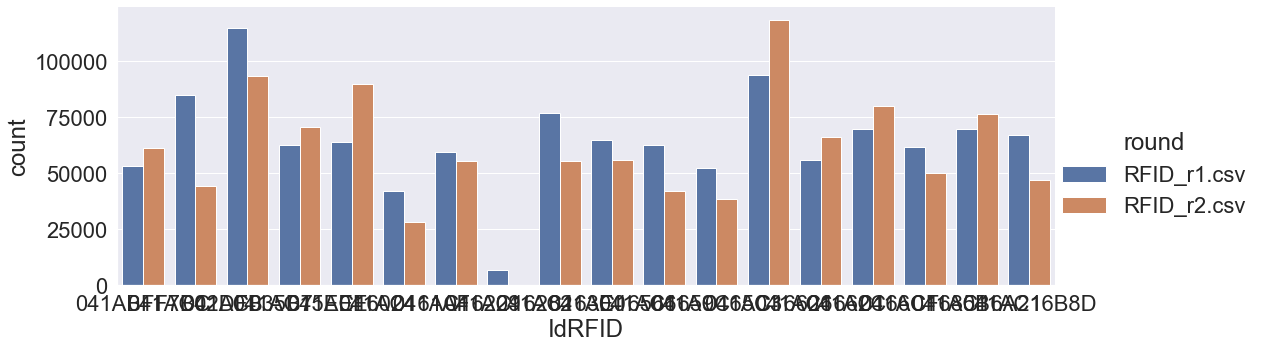

In [10]:
sns.catplot(x='IdRFID', y='count', hue='round', data=RFID_count, kind='bar', height=5, aspect=3)

#### Remove bad RFID and nan from both data sets

In [11]:
print(data_RFID.shape)
print(data_comb.shape)

data_RFID = data_RFID[data_RFID['IdRFID']!='041AC16282']
data_comb = data_comb[data_comb['IdRFID']!='041AC16282']

data_RFID = data_RFID[~data_RFID['IdRFID'].isna()]    
data_comb = data_comb[~data_comb['IdRFID'].isna()]

print(data_RFID.shape)
print(data_comb.shape)
    
data_RFID.head()

(633422, 39)
(103364, 54)
(632739, 39)
(102762, 54)


,Unnamed: 0,Round,Timepoint,Cage,IdRFID,Animal,Injury,Sex,Cage_N,unitLabel_drink,unitLabel,eventDuration,ld_cycle,ld_day,day,alcohol_on,after_weekend,RFID_hour,RFID_min,RFID_second,RFID_datetime_start,RFID_datetime_end,RFID_time_start,RFID_time_end,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running,RFID_file,22_11_11,22_11_18,22_11_25,22_12_02,23_01_06,23_01_13,23_01_20,23_01_27,round
0,0,MPc1,1m,1,041ABFF7BC,2154,sham,male,4,etoh_02,Spyder1.20,2.290,dark,1,0,yes,0,18,8,38,2022-11-11 18:08:38.854982399,2022-11-11 18:08:41.144982399,18:08:38,18:08:41,1088,65318,-6,-352,-21142,Idspyder-22.11.11.csv,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,RFID_r1.csv
1,1,MPc1,1m,1,041ABFF7BC,2154,sham,male,4,water,Spyder1.01,5.366,dark,1,0,yes,0,18,9,34,2022-11-11 18:09:34.690032000,2022-11-11 18:09:40.056032000,18:09:34,18:09:40,1089,65374,-6,-351,-21086,Idspyder-22.11.11.csv,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,RFID_r1.csv
2,2,MPc1,1m,1,041ABFF7BC,2154,sham,male,4,water,Spyder1.01,5.264,dark,1,0,yes,0,18,10,32,2022-11-11 18:10:32.770012799,2022-11-11 18:10:38.034012799,18:10:32,18:10:38,1090,65432,-6,-350,-21028,Idspyder-22.11.11.csv,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,RFID_r1.csv
3,3,MPc1,1m,1,041ABFF7BC,2154,sham,male,4,water,Spyder1.01,0.075,dark,1,0,yes,0,18,10,39,2022-11-11 18:10:39.149011200,2022-11-11 18:10:39.224011200,18:10:39,18:10:39,1090,65439,-6,-350,-21021,Idspyder-22.11.11.csv,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,RFID_r1.csv
4,4,MPc1,1m,1,041ABFF7BC,2154,sham,male,4,water,Spyder1.01,0.075,dark,1,0,yes,0,18,10,48,2022-11-11 18:10:48.400982400,2022-11-11 18:10:48.475982400,18:10:48,18:10:48,1090,65448,-6,-350,-21012,Idspyder-22.11.11.csv,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,RFID_r1.csv


### Weight data

#### Compute g/kg intake

In [12]:
data_final_weight = pd.DataFrame()

for file in data_comb['VDM_file'].unique():
    print(file)
    d_int = data_comb[data_comb['VDM_file']==file]
    
    if file == 'w_e05_e10_e2.5_MPc1_221111.csv':
        d_int['weight'] = d_int['22_11_11']
        
    if file == 'w_e05_e10_e2.5_MPc1_221114.csv':
        d_int['weight'] = d_int['22_11_11']
        
    if file == 'w_e05_e10_e2.5_MPc1_221118.csv':
        d_int['weight'] = d_int['22_11_18']

    if file == 'w_e05_e10_e2.5_MPc1_221125.csv':
        d_int['weight'] = d_int['22_11_25']
        
    if file == 'w_e05_e10_e2.5_MPc1_221202.csv':
        d_int['weight'] = d_int['22_12_02']
        
    if file == 'e05_e10_e2.5_w_MPc1_221204.csv':
        d_int['weight'] = d_int['22_12_02']
        
    if file == 'w_e10_e20_e05_MPc1_230106.csv':
        d_int['weight'] = d_int['23_01_06']

    if file == 'w_e10_e20_e05_MPc1_230113.csv':
        d_int['weight'] = d_int['23_01_13']
        
    if file == 'w_e10_e20_e05_MPc1_230120.csv':
        d_int['weight'] = d_int['23_01_20']
        
    if file == 'w_e10_e20_e05_MPc1_230127.csv':
        d_int['weight'] = d_int['23_01_27']
        
    if file == 'w_e10_e20_e05_MPc1_230129.csv':
        d_int['weight'] = d_int['23_01_27']
        
    if data_final_weight.empty:
        data_final_weight = d_int
    else:
        data_final_weight = pd.concat([data_final_weight, d_int], axis=0)
        
    print(data_final_weight.shape,'\n')
    
data_final_weight.head()

w_e05_e10_e2.5_MPc1_221111.csv
(5160, 55) 

w_e05_e10_e2.5_MPc1_221114.csv
(12890, 55) 

w_e05_e10_e2.5_MPc1_221118.csv
(25810, 55) 

w_e05_e10_e2.5_MPc1_221125.csv
(38985, 55) 

w_e05_e10_e2.5_MPc1_221202.csv
(42581, 55) 

e05_e10_e2.5_w_MPc1_221204.csv
(51898, 55) 

w_e10_e20_e05_MPc1_230106.csv
(67542, 55) 

w_e10_e20_e05_MPc1_230113.csv
(79351, 55) 

w_e10_e20_e05_MPc1_230120.csv
(91288, 55) 

w_e10_e20_e05_MPc1_230127.csv
(94404, 55) 

w_e10_e20_e05_MPc1_230129.csv
(102762, 55) 



,Unnamed: 0,Round,Build,Startdate,Timepoint,Cage,IdRFID,Animal,ARF_Cage,Injury,Sex,Cage_N,22_11_11,22_11_18,22_11_25,22_12_02,23_01_06,23_01_13,23_01_20,23_01_27,index,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,VDM_drink,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,ld_cycle,ld_day,alcohol_on,after_weekend,VDM_RFID_timediff,VDM_RFID_timediff_bool,min_count,sec_count,hour_count_running,min_count_running,sec_count_running,substance,round,weight
0,0,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,1,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 19:51:51,drink_4,0.021,2022-11-11 19:51:51,1.668196e+09,2022-11-11,11,19:51:51,19,51,51,dark_pm,etoh_02,8.770,041ABFF7BC,etoh_02,2022-11-11 19:51:44.387020800,2022-11-11 19:51:53.157020800,dark,1.0,yes,0.0,0.000000,same,1191,71511,19.0,1191.0,71451.0,etoh_02,etoh_r1.csv,30.7
1,1,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,5,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 21:15:56,drink_4,0.021,2022-11-11 21:15:56,1.668201e+09,2022-11-11,11,21:15:56,21,15,56,dark_pm,etoh_02,3.592,041ABFF7BC,etoh_02,2022-11-11 21:14:55.025030400,2022-11-11 21:14:58.617030400,dark,1.0,yes,0.0,57.382969,diff,1275,76556,21.0,1275.0,76496.0,etoh_02,etoh_r1.csv,30.7
2,2,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,19,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 21:46:35,drink_4,0.021,2022-11-11 21:46:35,1.668203e+09,2022-11-11,11,21:46:35,21,46,35,dark_pm,etoh_02,0.075,041ABFF7BC,etoh_02,2022-11-11 21:46:33.672979200,2022-11-11 21:46:33.747979200,dark,1.0,yes,0.0,1.252020,diff,1306,78395,21.0,1306.0,78335.0,etoh_02,etoh_r1.csv,30.7
3,3,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,20,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 21:46:38,drink_4,0.021,2022-11-11 21:46:38,1.668203e+09,2022-11-11,11,21:46:38,21,46,38,dark_pm,etoh_02,0.075,041ABFF7BC,etoh_02,2022-11-11 21:46:33.672979200,2022-11-11 21:46:33.747979200,dark,1.0,yes,0.0,4.252020,diff,1306,78398,21.0,1306.0,78338.0,etoh_02,etoh_r1.csv,30.7
4,4,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,97,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 23:12:05,drink_4,0.021,2022-11-11 23:12:05,1.668208e+09,2022-11-11,11,23:12:05,23,12,5,dark_pm,etoh_02,0.075,041ABFF7BC,etoh_02,2022-11-11 23:12:00.096019200,2022-11-11 23:12:00.171019200,dark,1.0,yes,0.0,4.828980,diff,1392,83525,23.0,1392.0,83465.0,etoh_02,etoh_r1.csv,30.7


In [13]:
data_final = pd.DataFrame()

for substance in data_final_weight['substance'].unique():
    print(substance)
    d_int = data_final_weight[data_final_weight['substance']==substance]
    
    if substance == 'water':
        d_int['intake_g_kg'] = d_int['value'] / (d_int['weight']/1000)
        
    if substance == 'etoh_02':
         d_int['intake_g_kg'] = (d_int['value']*.02) / (d_int['weight']/1000)
        
    if substance == 'etoh_05':
        d_int['intake_g_kg'] = (d_int['value']*.05) / (d_int['weight']/1000)

    if substance == 'etoh_10':
        d_int['intake_g_kg'] = (d_int['value']*.1) / (d_int['weight']/1000)
        
    if substance == 'etoh_20':
        d_int['intake_g_kg'] = (d_int['value']*.2) / (d_int['weight']/1000)
        
    if data_final.empty:
        data_final = d_int
    else:
        data_final = pd.concat([data_final, d_int], axis=0)
        
    print(data_final.shape,'\n')
    
data_final.head()

etoh_02
(4061, 56) 

etoh_05
(12393, 56) 

etoh_10
(27099, 56) 

water
(101045, 56) 

etoh_20
(102762, 56) 



,Unnamed: 0,Round,Build,Startdate,Timepoint,Cage,IdRFID,Animal,ARF_Cage,Injury,Sex,Cage_N,22_11_11,22_11_18,22_11_25,22_12_02,23_01_06,23_01_13,23_01_20,23_01_27,index,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,VDM_drink,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,ld_cycle,ld_day,alcohol_on,after_weekend,VDM_RFID_timediff,VDM_RFID_timediff_bool,min_count,sec_count,hour_count_running,min_count_running,sec_count_running,substance,round,weight,intake_g_kg
0,0,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,1,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 19:51:51,drink_4,0.021,2022-11-11 19:51:51,1.668196e+09,2022-11-11,11,19:51:51,19,51,51,dark_pm,etoh_02,8.770,041ABFF7BC,etoh_02,2022-11-11 19:51:44.387020800,2022-11-11 19:51:53.157020800,dark,1.0,yes,0.0,0.000000,same,1191,71511,19.0,1191.0,71451.0,etoh_02,etoh_r1.csv,30.7,0.013681
1,1,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,5,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 21:15:56,drink_4,0.021,2022-11-11 21:15:56,1.668201e+09,2022-11-11,11,21:15:56,21,15,56,dark_pm,etoh_02,3.592,041ABFF7BC,etoh_02,2022-11-11 21:14:55.025030400,2022-11-11 21:14:58.617030400,dark,1.0,yes,0.0,57.382969,diff,1275,76556,21.0,1275.0,76496.0,etoh_02,etoh_r1.csv,30.7,0.013681
2,2,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,19,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 21:46:35,drink_4,0.021,2022-11-11 21:46:35,1.668203e+09,2022-11-11,11,21:46:35,21,46,35,dark_pm,etoh_02,0.075,041ABFF7BC,etoh_02,2022-11-11 21:46:33.672979200,2022-11-11 21:46:33.747979200,dark,1.0,yes,0.0,1.252020,diff,1306,78395,21.0,1306.0,78335.0,etoh_02,etoh_r1.csv,30.7,0.013681
3,3,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,20,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 21:46:38,drink_4,0.021,2022-11-11 21:46:38,1.668203e+09,2022-11-11,11,21:46:38,21,46,38,dark_pm,etoh_02,0.075,041ABFF7BC,etoh_02,2022-11-11 21:46:33.672979200,2022-11-11 21:46:33.747979200,dark,1.0,yes,0.0,4.252020,diff,1306,78398,21.0,1306.0,78338.0,etoh_02,etoh_r1.csv,30.7,0.013681
4,4,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,97,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 23:12:05,drink_4,0.021,2022-11-11 23:12:05,1.668208e+09,2022-11-11,11,23:12:05,23,12,5,dark_pm,etoh_02,0.075,041ABFF7BC,etoh_02,2022-11-11 23:12:00.096019200,2022-11-11 23:12:00.171019200,dark,1.0,yes,0.0,4.828980,diff,1392,83525,23.0,1392.0,83465.0,etoh_02,etoh_r1.csv,30.7,0.013681


#### weight timecourse

In [14]:
weights = pd.melt(data_final, id_vars=['round', 'IdRFID', 'Injury', 'Cage_N'], value_vars=['22_11_11', '22_11_18', '22_11_25', '22_12_02', '23_01_06',
       '23_01_13', '23_01_20', '23_01_27',])#.reset_index()

weights.drop_duplicates(inplace=True)

weights.head()

,round,IdRFID,Injury,Cage_N,variable,value
0,etoh_r1.csv,041ABFF7BC,sham,4,22_11_11,30.7
69,etoh_r1.csv,041AC161AF,sham,4,22_11_11,30.3
252,etoh_r1.csv,041AC165C3,sham,4,22_11_11,29.6
415,etoh_r1.csv,041AC1685B,sham,4,22_11_11,34.5
494,etoh_r1.csv,041AC16024,blast,4,22_11_11,32.2


<Figure size 936x648 with 0 Axes>

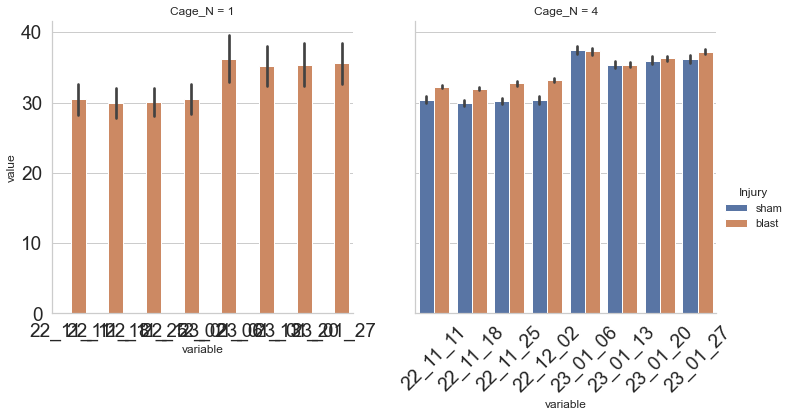

In [15]:
sns.set_theme(style="whitegrid")

plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 

plt.figure(figsize=(13,9))


sns.catplot(x='variable', y='value', data=weights,  kind='bar', 
            ci=68, hue='Injury', col='Cage_N')

#plt.xlabel('Substance', fontsize=23)
#plt.ylabel('Total volume per day (mL)', fontsize=23)
#plt.title('Male', fontsize=23)
#plt.ylabel('Daily Intake (ml)')
plt.xticks(rotation=45)

plt.show()

## Drinking data

In [118]:
data_final_clean_3s = data_final[data_final['VDM_RFID_timediff']<3]
data_final_clean_3s = data_final_clean_3s[data_final_clean_3s['ld_day']>0]
data_final_clean_3s = data_final_clean_3s[data_final_clean_3s['Cage_N']==4]
data_final_clean_3s = data_final_clean_3s[data_final_clean_3s['alcohol_on']=='yes']

data_final_clean_3s.head()

,Unnamed: 0,Round,Build,Startdate,Timepoint,Cage,IdRFID,Animal,ARF_Cage,Injury,Sex,Cage_N,22_11_11,22_11_18,22_11_25,22_12_02,23_01_06,23_01_13,23_01_20,23_01_27,index,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,VDM_drink,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,ld_cycle,ld_day,alcohol_on,after_weekend,VDM_RFID_timediff,VDM_RFID_timediff_bool,min_count,sec_count,hour_count_running,min_count_running,sec_count_running,substance,round,weight,intake_g_kg
0,0,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,1,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 19:51:51,drink_4,0.021,2022-11-11 19:51:51,1.668196e+09,2022-11-11,11,19:51:51,19,51,51,dark_pm,etoh_02,8.770,041ABFF7BC,etoh_02,2022-11-11 19:51:44.387020800,2022-11-11 19:51:53.157020800,dark,1.0,yes,0.0,0.00000,same,1191,71511,19.0,1191.0,71451.0,etoh_02,etoh_r1.csv,30.7,0.013681
2,2,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,19,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 21:46:35,drink_4,0.021,2022-11-11 21:46:35,1.668203e+09,2022-11-11,11,21:46:35,21,46,35,dark_pm,etoh_02,0.075,041ABFF7BC,etoh_02,2022-11-11 21:46:33.672979200,2022-11-11 21:46:33.747979200,dark,1.0,yes,0.0,1.25202,diff,1306,78395,21.0,1306.0,78335.0,etoh_02,etoh_r1.csv,30.7,0.013681
7,7,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,102,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 23:12:13,drink_4,0.021,2022-11-11 23:12:13,1.668208e+09,2022-11-11,11,23:12:13,23,12,13,dark_pm,etoh_02,147.875,041ABFF7BC,etoh_02,2022-11-11 23:12:12.734006400,2022-11-11 23:14:40.609006400,dark,1.0,yes,0.0,0.00000,same,1392,83533,23.0,1392.0,83473.0,etoh_02,etoh_r1.csv,30.7,0.013681
12,12,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,141,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 23:39:47,drink_4,0.021,2022-11-11 23:39:47,1.668210e+09,2022-11-11,11,23:39:47,23,39,47,dark_pm,etoh_02,9.457,041ABFF7BC,etoh_02,2022-11-11 23:39:46.351036800,2022-11-11 23:39:55.808036800,dark,1.0,yes,0.0,0.00000,same,1419,85187,23.0,1419.0,85127.0,etoh_02,etoh_r1.csv,30.7,0.013681
13,13,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,156,w_e05_e10_e2.5_MPc1_221111.csv,1,11/12/22 00:01:18,drink_4,0.021,2022-11-12 00:01:18,1.668211e+09,2022-11-12,12,00:01:18,0,1,18,dark_am,etoh_02,107.391,041ABFF7BC,etoh_02,2022-11-12 00:01:17.834044800,2022-11-12 00:03:05.225044800,dark,1.0,yes,0.0,0.00000,same,1,78,0.0,1.0,18.0,etoh_02,etoh_r1.csv,30.7,0.013681


### Summary across all days

#### data prep

In [119]:
data_final_clean_3s_summary = data_final_clean_3s.groupby(['round', 'Injury', 'Cage', 'Cage_N', 'IdRFID',  
                                   'substance', ])[['value', 'intake_g_kg']].sum().reset_index()

data_final_clean_3s_summary.head()

,round,Injury,Cage,Cage_N,IdRFID,substance,value,intake_g_kg
0,etoh_r1.csv,blast,2,4,041AC16024,etoh_02,21.966,13.352653
1,etoh_r1.csv,blast,2,4,041AC16024,etoh_05,12.537,18.970648
2,etoh_r1.csv,blast,2,4,041AC16024,etoh_10,4.830,14.683685
3,etoh_r1.csv,blast,2,4,041AC16024,water,10.374,310.249277
4,etoh_r1.csv,blast,2,4,041AC16566,etoh_02,1.890,1.141392


In [120]:
data_summary_gkg = data_final_clean_3s_summary.set_index(['round', 'Injury', 'Cage', 'Cage_N', 'IdRFID',  
                                  'substance'])[['intake_g_kg']].unstack(-1).reset_index()

data_summary_gkg.columns = ['round', 'Injury', 'Cage', 'Cage_N', 'IdRFID', 
                        'etoh_02', 'etoh_05', 'etoh_10', 'etoh_20', 'water',]

data_summary_gkg.replace(np.nan, 0, inplace=True)

data_summary_gkg['total_alcohol_intake'] = data_summary_gkg['etoh_02'] + data_summary_gkg['etoh_05'] + data_summary_gkg['etoh_10'] + data_summary_gkg['etoh_20'] 

data_summary_gkg.head()

,round,Injury,Cage,Cage_N,IdRFID,etoh_02,etoh_05,etoh_10,etoh_20,water,total_alcohol_intake
0,etoh_r1.csv,blast,2,4,041AC16024,13.352653,18.970648,14.683685,0.0,310.249277,47.006987
1,etoh_r1.csv,blast,2,4,041AC16566,1.141392,5.286942,55.187776,0.0,30.065775,61.616110
2,etoh_r1.csv,blast,2,4,041AC1662C,9.233815,14.979533,14.863819,0.0,376.383198,39.077166
3,etoh_r1.csv,blast,2,4,041AC16A21,2.885337,8.101872,39.905990,0.0,143.119001,50.893199
4,etoh_r1.csv,blast,5,4,041AC15EEE,0.262810,0.496770,0.320338,0.0,823.268103,1.079918


In [121]:
data_summary_vol = data_final_clean_3s_summary.set_index(['round', 'Injury', 'Cage', 'Cage_N', 'IdRFID',  
                                  'substance'])[['value']].unstack(-1).reset_index()

data_summary_vol.columns = ['round', 'Injury', 'Cage', 'Cage_N', 'IdRFID', 
                        'etoh_02', 'etoh_05', 'etoh_10', 'etoh_20', 'water',]

data_summary_vol.replace(np.nan, 0, inplace=True)

data_summary_vol['total_alcohol_intake'] = data_summary_vol['etoh_02'] + data_summary_vol['etoh_05'] + data_summary_vol['etoh_10'] + data_summary_vol['etoh_20'] 

data_summary_vol['overall_preference'] = data_summary_vol['total_alcohol_intake'] / (data_summary_vol['total_alcohol_intake'] + data_summary_vol['water'])

data_summary_vol.head()

,round,Injury,Cage,Cage_N,IdRFID,etoh_02,etoh_05,etoh_10,etoh_20,water,total_alcohol_intake,overall_preference
0,etoh_r1.csv,blast,2,4,041AC16024,21.966,12.537,4.830,0.0,10.374,39.333,0.791297
1,etoh_r1.csv,blast,2,4,041AC16566,1.890,3.486,18.081,0.0,0.987,23.457,0.959622
2,etoh_r1.csv,blast,2,4,041AC1662C,14.616,9.555,4.746,0.0,12.138,28.917,0.704348
3,etoh_r1.csv,blast,2,4,041AC16A21,4.620,5.103,12.453,0.0,4.410,22.176,0.834123
4,etoh_r1.csv,blast,5,4,041AC15EEE,0.441,0.336,0.105,0.0,27.216,0.882,0.031390


##### Dose preference

In [122]:
data_summary_vol['PF'] =  ((data_summary_vol['etoh_02']*.02) + (data_summary_vol['etoh_05']*.05) + (data_summary_vol['etoh_10']*.1) + (data_summary_vol['etoh_20']*.2)) \
/ (data_summary_vol['etoh_02'] + data_summary_vol['etoh_05'] + data_summary_vol['etoh_10'] + data_summary_vol['etoh_20'])

data_summary_vol.head()

,round,Injury,Cage,Cage_N,IdRFID,etoh_02,etoh_05,etoh_10,etoh_20,water,total_alcohol_intake,overall_preference,PF
0,etoh_r1.csv,blast,2,4,041AC16024,21.966,12.537,4.830,0.0,10.374,39.333,0.791297,0.039386
1,etoh_r1.csv,blast,2,4,041AC16566,1.890,3.486,18.081,0.0,0.987,23.457,0.959622,0.086124
2,etoh_r1.csv,blast,2,4,041AC1662C,14.616,9.555,4.746,0.0,12.138,28.917,0.704348,0.043043
3,etoh_r1.csv,blast,2,4,041AC16A21,4.620,5.103,12.453,0.0,4.410,22.176,0.834123,0.071828
4,etoh_r1.csv,blast,5,4,041AC15EEE,0.441,0.336,0.105,0.0,27.216,0.882,0.031390,0.040952


##### Preference

In [123]:
data_summary_vol['pref_02'] = data_summary_vol['etoh_02'] / (data_summary_vol['water'] + data_summary_vol['etoh_02'])
data_summary_vol['pref_05'] = data_summary_vol['etoh_05'] / (data_summary_vol['water'] + data_summary_vol['etoh_05'])
data_summary_vol['pref_10'] = data_summary_vol['etoh_10'] / (data_summary_vol['water'] + data_summary_vol['etoh_10'])
data_summary_vol['pref_20'] = data_summary_vol['etoh_20'] / (data_summary_vol['water'] + data_summary_vol['etoh_20'])

data_summary_vol.head()

,round,Injury,Cage,Cage_N,IdRFID,etoh_02,etoh_05,etoh_10,etoh_20,water,total_alcohol_intake,overall_preference,PF,pref_02,pref_05,pref_10,pref_20
0,etoh_r1.csv,blast,2,4,041AC16024,21.966,12.537,4.830,0.0,10.374,39.333,0.791297,0.039386,0.679221,0.547204,0.317680,0.0
1,etoh_r1.csv,blast,2,4,041AC16566,1.890,3.486,18.081,0.0,0.987,23.457,0.959622,0.086124,0.656934,0.779343,0.948238,0.0
2,etoh_r1.csv,blast,2,4,041AC1662C,14.616,9.555,4.746,0.0,12.138,28.917,0.704348,0.043043,0.546311,0.440465,0.281095,0.0
3,etoh_r1.csv,blast,2,4,041AC16A21,4.620,5.103,12.453,0.0,4.410,22.176,0.834123,0.071828,0.511628,0.536424,0.738481,0.0
4,etoh_r1.csv,blast,5,4,041AC15EEE,0.441,0.336,0.105,0.0,27.216,0.882,0.031390,0.040952,0.015945,0.012195,0.003843,0.0


In [124]:
preference = pd.melt(data_summary_vol, id_vars=['round', 'IdRFID', 'Injury', 'Cage_N'], 
                     value_vars=['pref_02', 'pref_05', 'pref_10', 'pref_20'])

preference.drop_duplicates(inplace=True)

preference.head()

,round,IdRFID,Injury,Cage_N,variable,value
0,etoh_r1.csv,041AC16024,blast,4,pref_02,0.679221
1,etoh_r1.csv,041AC16566,blast,4,pref_02,0.656934
2,etoh_r1.csv,041AC1662C,blast,4,pref_02,0.546311
3,etoh_r1.csv,041AC16A21,blast,4,pref_02,0.511628
4,etoh_r1.csv,041AC15EEE,blast,4,pref_02,0.015945


### Summary by day

#### data prep

In [125]:
data_final_clean_3s_day = data_final_clean_3s.groupby(['round', 'Injury', 'Cage', 'Cage_N', 'IdRFID', 'ld_day', 
                                   'substance', ])[['value', 'intake_g_kg']].sum().reset_index()

data_final_clean_3s_day.head()

,round,Injury,Cage,Cage_N,IdRFID,ld_day,substance,value,intake_g_kg
0,etoh_r1.csv,blast,2,4,041AC16024,1.0,etoh_02,2.415,1.500000
1,etoh_r1.csv,blast,2,4,041AC16024,1.0,etoh_05,0.126,0.195652
2,etoh_r1.csv,blast,2,4,041AC16024,1.0,etoh_10,0.294,0.913043
3,etoh_r1.csv,blast,2,4,041AC16024,2.0,etoh_02,2.772,1.721739
4,etoh_r1.csv,blast,2,4,041AC16024,2.0,etoh_05,0.336,0.521739


In [126]:
data_summary_day_gkg = data_final_clean_3s_day.set_index(['round', 'Injury', 'Cage', 'Cage_N', 'IdRFID', 'ld_day',
                                  'substance'])[['intake_g_kg']].unstack(-1).reset_index()

data_summary_day_gkg.columns = ['round', 'Injury', 'Cage', 'Cage_N', 'IdRFID', 'ld_day',
                        'etoh_02', 'etoh_05', 'etoh_10', 'etoh_20', 'water',]

data_summary_day_gkg.replace(np.nan, 0, inplace=True)

data_summary_day_gkg['total_alcohol_intake'] = data_summary_day_gkg['etoh_02'] + data_summary_day_gkg['etoh_05'] + data_summary_day_gkg['etoh_10'] + data_summary_day_gkg['etoh_20'] 

data_summary_day_gkg.head()

,round,Injury,Cage,Cage_N,IdRFID,ld_day,etoh_02,etoh_05,etoh_10,etoh_20,water,total_alcohol_intake
0,etoh_r1.csv,blast,2,4,041AC16024,1.0,1.500000,0.195652,0.913043,0.0,0.000000,2.608696
1,etoh_r1.csv,blast,2,4,041AC16024,2.0,1.721739,0.521739,0.652174,0.0,0.000000,2.895652
2,etoh_r1.csv,blast,2,4,041AC16024,3.0,1.891304,0.000000,0.130435,0.0,0.000000,2.021739
3,etoh_r1.csv,blast,2,4,041AC16024,5.0,0.978261,0.880435,0.260870,0.0,7.826087,2.119565
4,etoh_r1.csv,blast,2,4,041AC16024,7.0,0.652174,1.858696,2.478261,0.0,15.425504,4.989130


In [127]:
data_summary_day_vol = data_final_clean_3s_day.set_index(['round', 'Injury', 'Cage', 'Cage_N', 'IdRFID', 'ld_day',
                                  'substance'])[['value']].unstack(-1).reset_index()

data_summary_day_vol.columns = ['round', 'Injury', 'Cage', 'Cage_N', 'IdRFID', 'ld_day',
                        'etoh_02', 'etoh_05', 'etoh_10', 'etoh_20', 'water',]

data_summary_day_vol.replace(np.nan, 0, inplace=True)

data_summary_day_vol['total_alcohol_intake'] = data_summary_day_vol['etoh_02'] + data_summary_day_vol['etoh_05'] + data_summary_day_vol['etoh_10'] + data_summary_day_vol['etoh_20'] 

data_summary_day_vol['overall_preference'] = data_summary_day_vol['total_alcohol_intake'] / (data_summary_day_vol['total_alcohol_intake'] + data_summary_day_vol['water'])

data_summary_day_vol.head()

,round,Injury,Cage,Cage_N,IdRFID,ld_day,etoh_02,etoh_05,etoh_10,etoh_20,water,total_alcohol_intake,overall_preference
0,etoh_r1.csv,blast,2,4,041AC16024,1.0,2.415,0.126,0.294,0.0,0.000,2.835,1.000000
1,etoh_r1.csv,blast,2,4,041AC16024,2.0,2.772,0.336,0.210,0.0,0.000,3.318,1.000000
2,etoh_r1.csv,blast,2,4,041AC16024,3.0,3.045,0.000,0.042,0.0,0.000,3.087,1.000000
3,etoh_r1.csv,blast,2,4,041AC16024,5.0,1.575,0.567,0.084,0.0,0.252,2.226,0.898305
4,etoh_r1.csv,blast,2,4,041AC16024,7.0,1.050,1.197,0.798,0.0,0.504,3.045,0.857988


##### Dose preference

In [128]:
data_summary_day_vol['PF'] =  ((data_summary_day_vol['etoh_02']*.02) + (data_summary_day_vol['etoh_05']*.05) + (data_summary_day_vol['etoh_10']*.1) + (data_summary_day_vol['etoh_20']*.2)) \
/ (data_summary_day_vol['etoh_02'] + data_summary_day_vol['etoh_05'] + data_summary_day_vol['etoh_10'] + data_summary_day_vol['etoh_20'])

data_summary_day_vol.head()

,round,Injury,Cage,Cage_N,IdRFID,ld_day,etoh_02,etoh_05,etoh_10,etoh_20,water,total_alcohol_intake,overall_preference,PF
0,etoh_r1.csv,blast,2,4,041AC16024,1.0,2.415,0.126,0.294,0.0,0.000,2.835,1.000000,0.029630
1,etoh_r1.csv,blast,2,4,041AC16024,2.0,2.772,0.336,0.210,0.0,0.000,3.318,1.000000,0.028101
2,etoh_r1.csv,blast,2,4,041AC16024,3.0,3.045,0.000,0.042,0.0,0.000,3.087,1.000000,0.021088
3,etoh_r1.csv,blast,2,4,041AC16024,5.0,1.575,0.567,0.084,0.0,0.252,2.226,0.898305,0.030660
4,etoh_r1.csv,blast,2,4,041AC16024,7.0,1.050,1.197,0.798,0.0,0.504,3.045,0.857988,0.052759


##### Preference

In [94]:
data_summary_day_vol['pref_02'] = data_summary_day_vol['etoh_02'] / (data_summary_day_vol['water'] + data_summary_day_vol['etoh_02'])
data_summary_day_vol['pref_05'] = data_summary_day_vol['etoh_05'] / (data_summary_day_vol['water'] + data_summary_day_vol['etoh_05'])
data_summary_day_vol['pref_10'] = data_summary_day_vol['etoh_10'] / (data_summary_day_vol['water'] + data_summary_day_vol['etoh_10'])
data_summary_day_vol['pref_20'] = data_summary_day_vol['etoh_20'] / (data_summary_day_vol['water'] + data_summary_day_vol['etoh_20'])

data_summary_day_vol.replace(np.nan, 0, inplace=True)

data_summary_day_vol.head()

,round,Injury,Cage,Cage_N,IdRFID,ld_day,etoh_02,etoh_05,etoh_10,etoh_20,water,total_alcohol_intake,overall_preference,PF,pref_02,pref_05,pref_10,pref_20
0,etoh_r1.csv,blast,2,4,041AC16024,10.0,1.554,2.583,0.756,0.0,0.252,4.893,0.951020,0.048197,0.860465,0.911111,0.750000,0.0
1,etoh_r1.csv,blast,2,4,041AC16024,17.0,1.218,1.197,0.294,0.0,1.281,2.709,0.678947,0.041938,0.487395,0.483051,0.186667,0.0
2,etoh_r1.csv,blast,2,4,041AC16024,24.0,1.743,0.000,0.105,0.0,1.134,1.848,0.619718,0.024545,0.605839,0.000000,0.084746,0.0
3,etoh_r1.csv,blast,2,4,041AC16566,10.0,0.168,0.462,1.281,0.0,0.042,1.911,0.978495,0.080879,0.800000,0.916667,0.968254,0.0
4,etoh_r1.csv,blast,2,4,041AC16566,17.0,0.042,0.189,1.701,0.0,0.063,1.932,0.968421,0.093370,0.400000,0.750000,0.964286,0.0


In [95]:
preference_day = pd.melt(data_summary_day_vol, id_vars=['round', 'IdRFID', 'Injury', 'Cage_N', 'ld_day'], 
                     value_vars=['pref_02', 'pref_05', 'pref_10', 'pref_20'])

preference_day.drop_duplicates(inplace=True)

preference_day.head()

,round,IdRFID,Injury,Cage_N,ld_day,variable,value
0,etoh_r1.csv,041AC16024,blast,4,10.0,pref_02,0.860465
1,etoh_r1.csv,041AC16024,blast,4,17.0,pref_02,0.487395
2,etoh_r1.csv,041AC16024,blast,4,24.0,pref_02,0.605839
3,etoh_r1.csv,041AC16566,blast,4,10.0,pref_02,0.800000
4,etoh_r1.csv,041AC16566,blast,4,17.0,pref_02,0.400000


####  All days

#####  separate doses

<Figure size 936x648 with 0 Axes>

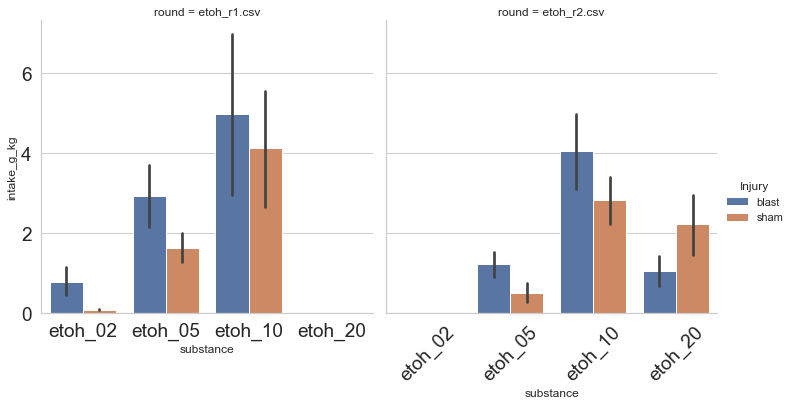

In [96]:
sns.set_theme(style="whitegrid")

plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 

plt.figure(figsize=(13,9))

d = data_final_clean_3s_summary[data_final_clean_3s_summary['substance']!='water']
sns.catplot(x='substance', y='intake_g_kg', data=d,  kind='bar', 
            ci=68, hue='Injury', col='round')

#plt.xlabel('Substance', fontsize=23)
#plt.ylabel('Total volume per day (mL)', fontsize=23)
#plt.title('Male', fontsize=23)
#plt.ylabel('Daily Intake (ml)')
plt.xticks(rotation=45)

plt.show()

#####  total intake

<Figure size 936x648 with 0 Axes>

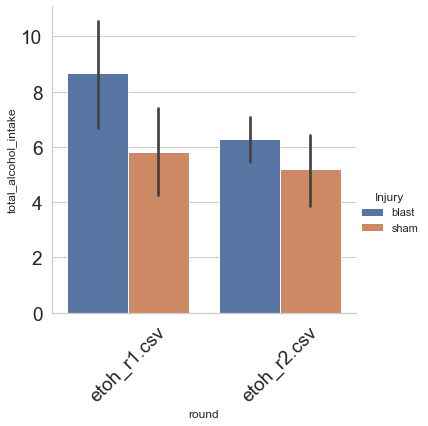

In [97]:
sns.set_theme(style="whitegrid")

plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 

plt.figure(figsize=(13,9))

sns.catplot(x='round', y='total_alcohol_intake', data=data_summary_gkg,  kind='bar', 
            ci=68, hue='Injury')

#plt.xlabel('Substance', fontsize=23)
#plt.ylabel('Total volume per day (mL)', fontsize=23)
#plt.title('Male', fontsize=23)
#plt.ylabel('Daily Intake (ml)')
plt.xticks(rotation=45)

plt.show()

<Figure size 936x648 with 0 Axes>

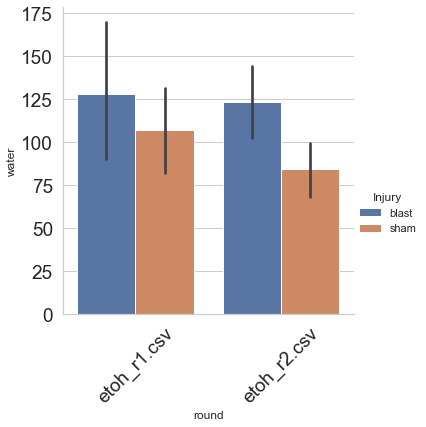

In [98]:
sns.set_theme(style="whitegrid")

plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 

plt.figure(figsize=(13,9))

sns.catplot(x='round', y='water', data=data_summary_gkg,  kind='bar', 
            ci=68, hue='Injury')

#plt.xlabel('Substance', fontsize=23)
#plt.ylabel('Total volume per day (mL)', fontsize=23)
#plt.title('Male', fontsize=23)
#plt.ylabel('Daily Intake (ml)')
plt.xticks(rotation=45)

plt.show()

#####  Dose preference and alcohol to water preference

<Figure size 936x648 with 0 Axes>

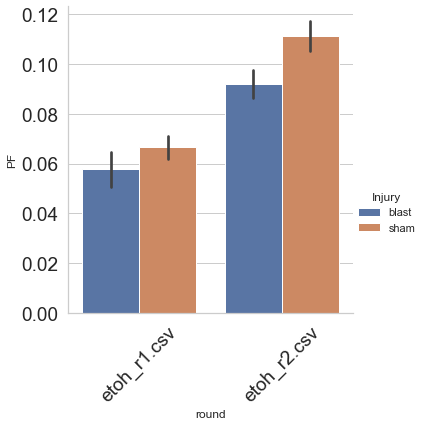

In [99]:
sns.set_theme(style="whitegrid")

plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 

plt.figure(figsize=(13,9))

sns.catplot(x='round', y='PF', data=data_summary_vol,  kind='bar', 
            ci=68, hue='Injury')

#plt.xlabel('Substance', fontsize=23)
#plt.ylabel('Total volume per day (mL)', fontsize=23)
#plt.title('Male', fontsize=23)
#plt.ylabel('Daily Intake (ml)')
plt.xticks(rotation=45)

plt.show()

<Figure size 936x648 with 0 Axes>

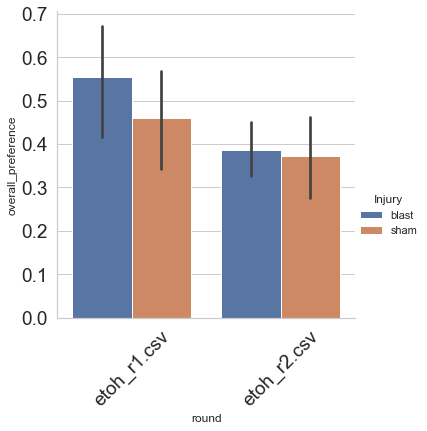

In [100]:
sns.set_theme(style="whitegrid")

plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 

plt.figure(figsize=(13,9))

sns.catplot(x='round', y='overall_preference', data=data_summary_vol,  kind='bar', 
            ci=68, hue='Injury')

#plt.xlabel('Substance', fontsize=23)
#plt.ylabel('Total volume per day (mL)', fontsize=23)
#plt.title('Male', fontsize=23)
#plt.ylabel('Daily Intake (ml)')
plt.xticks(rotation=45)

plt.show()

<Figure size 936x648 with 0 Axes>

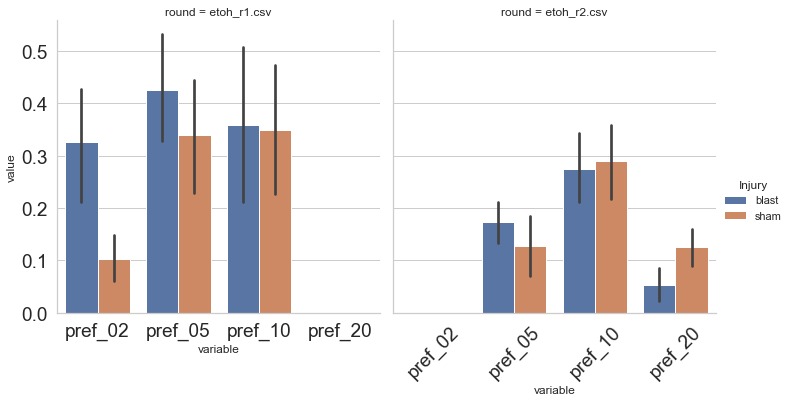

In [101]:
sns.set_theme(style="whitegrid")

plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 

plt.figure(figsize=(13,9))

sns.catplot(x='variable', y='value', data=preference,  kind='bar', 
            ci=68, hue='Injury', col='round')

#plt.xlabel('Substance', fontsize=23)
#plt.ylabel('Total volume per day (mL)', fontsize=23)
#plt.title('Male', fontsize=23)
#plt.ylabel('Daily Intake (ml)')
plt.xticks(rotation=45)

plt.show()

#### By day

#####  separate doses

<Figure size 936x648 with 0 Axes>

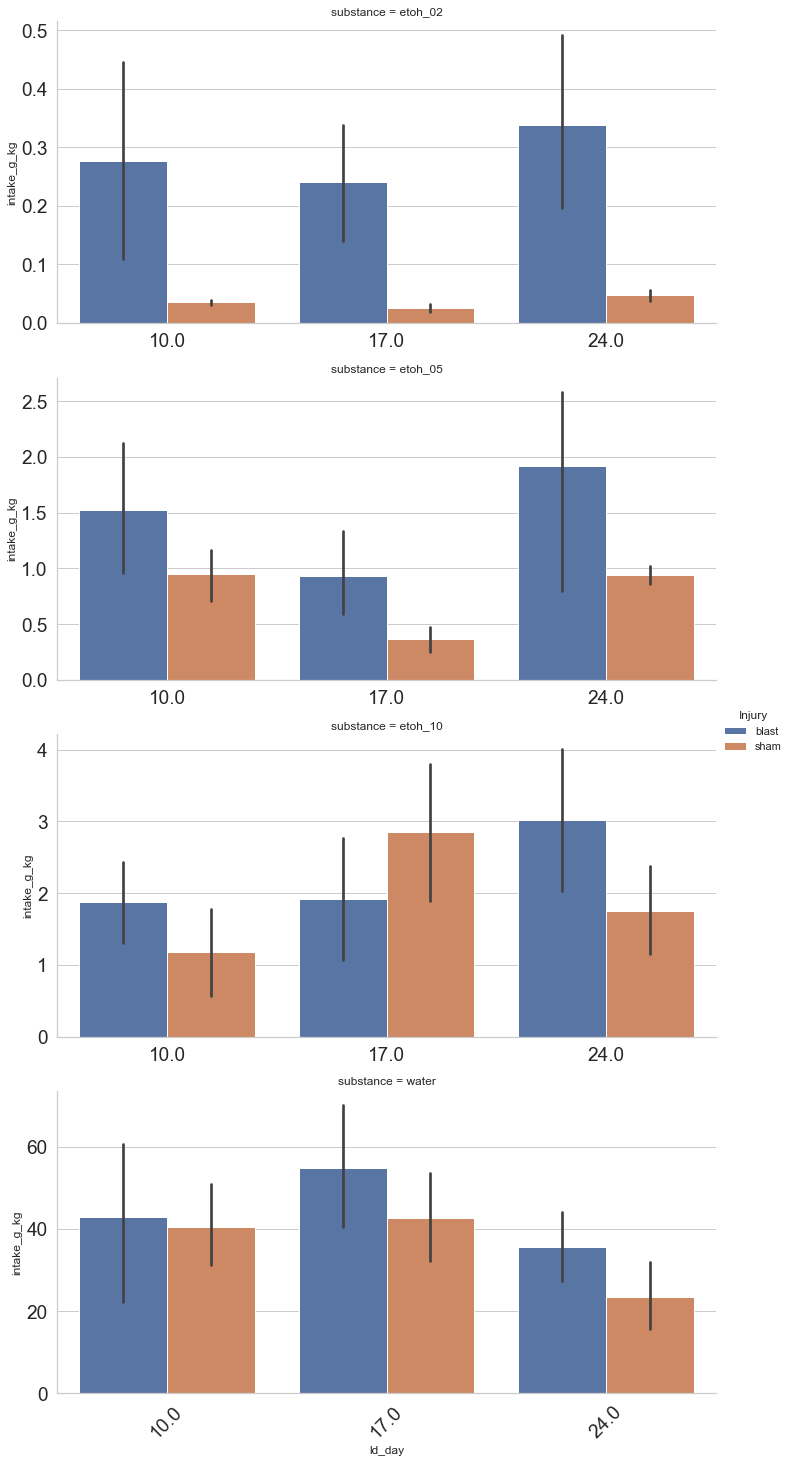

In [102]:
sns.set_theme(style="whitegrid")

plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 

plt.figure(figsize=(13,9))

d = data_final_clean_3s_day[data_final_clean_3s_day['round']=='etoh_r1.csv']
sns.catplot(x='ld_day', y='intake_g_kg', data=d,  kind='bar', 
            ci=68, hue='Injury', col='substance', col_wrap=1, height=5, aspect=2, sharey=False, sharex=False)

plt.xticks(rotation=45)

plt.show()

#####  total intake

<Figure size 936x648 with 0 Axes>

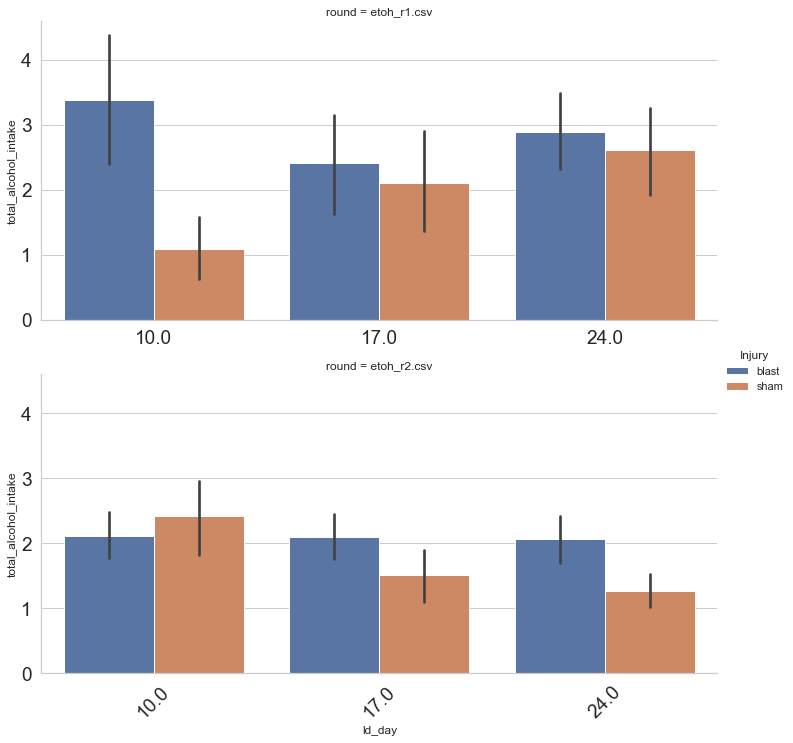

In [103]:
sns.set_theme(style="whitegrid")

plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 

plt.figure(figsize=(13,9))

sns.catplot(x='ld_day', y='total_alcohol_intake', data=data_summary_day_gkg,  kind='bar', 
            ci=68, hue='Injury', col='round', col_wrap=1, height=5, aspect=2, sharex=False)

#plt.xlabel('Substance', fontsize=23)
#plt.ylabel('Total volume per day (mL)', fontsize=23)
#plt.title('Male', fontsize=23)
#plt.ylabel('Daily Intake (ml)')
plt.xticks(rotation=45)

plt.show()

<Figure size 936x648 with 0 Axes>

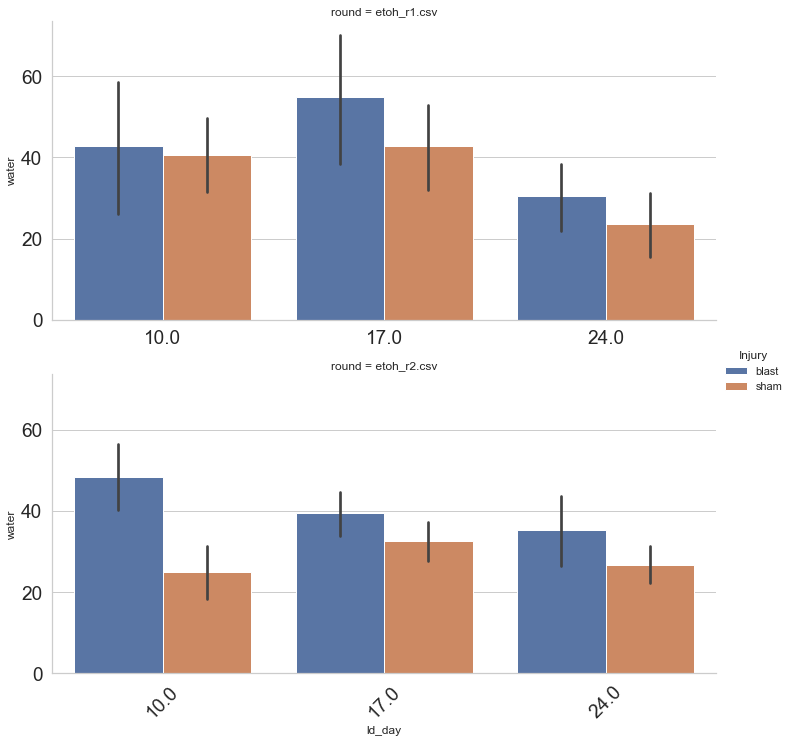

In [104]:
sns.set_theme(style="whitegrid")

plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 

plt.figure(figsize=(13,9))

sns.catplot(x='ld_day', y='water', data=data_summary_day_gkg,  kind='bar', 
            ci=68, hue='Injury', col='round', col_wrap=1, height=5, aspect=2, sharex=False)

#plt.xlabel('Substance', fontsize=23)
#plt.ylabel('Total volume per day (mL)', fontsize=23)
#plt.title('Male', fontsize=23)
#plt.ylabel('Daily Intake (ml)')
plt.xticks(rotation=45)

plt.show()

#####  Dose preference and alcohol to water preference

<Figure size 936x648 with 0 Axes>

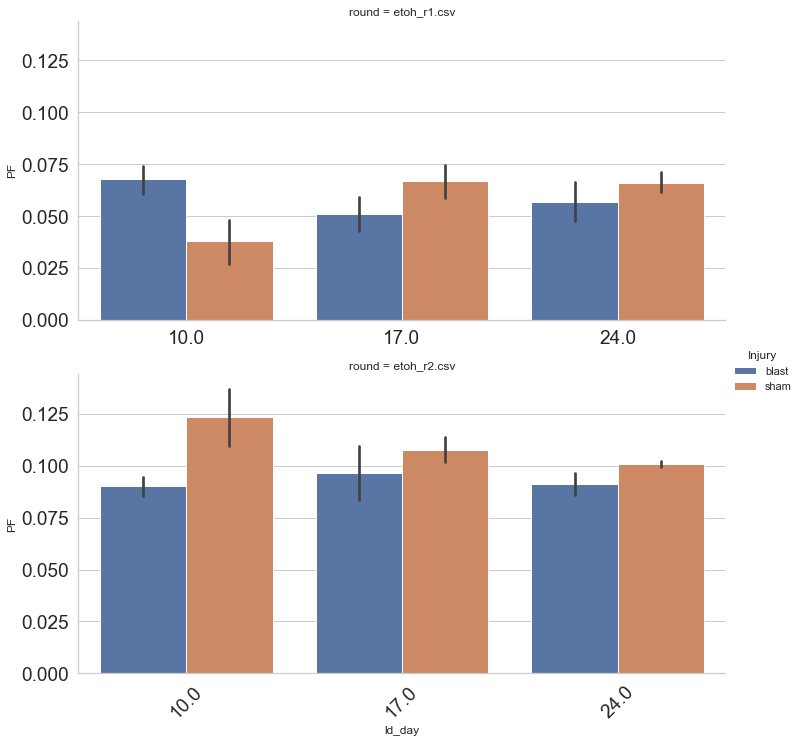

In [105]:
sns.set_theme(style="whitegrid")

plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 

plt.figure(figsize=(13,9))

sns.catplot(x='ld_day', y='PF', data=data_summary_day_vol,  kind='bar', 
            ci=68, hue='Injury', col='round', col_wrap=1, height=5, aspect=2, sharex=False)

#plt.xlabel('Substance', fontsize=23)
#plt.ylabel('Total volume per day (mL)', fontsize=23)
#plt.title('Male', fontsize=23)
#plt.ylabel('Daily Intake (ml)')
plt.xticks(rotation=45)

plt.show()

<Figure size 936x648 with 0 Axes>

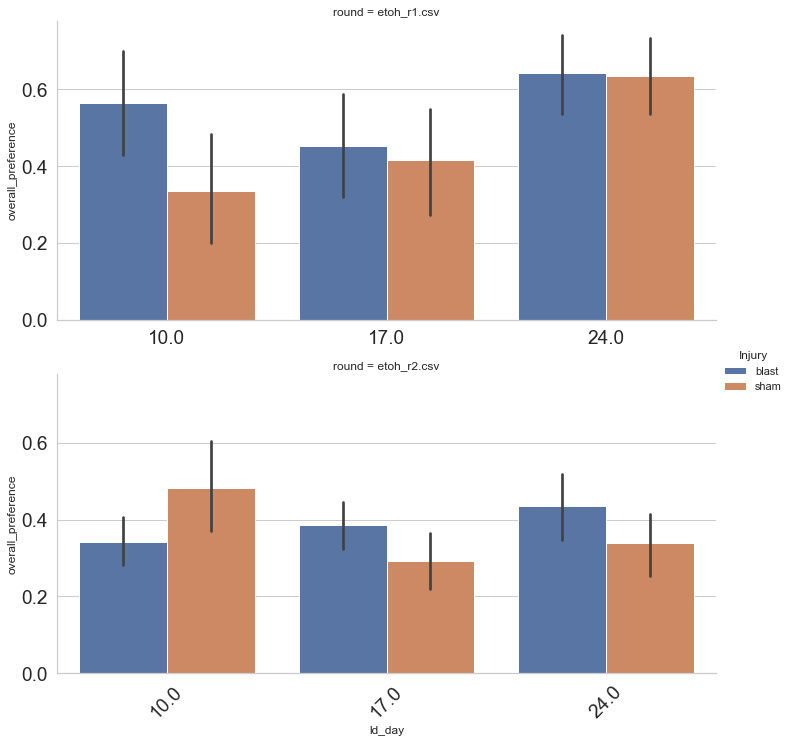

In [106]:
sns.set_theme(style="whitegrid")

plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 

plt.figure(figsize=(13,9))

sns.catplot(x='ld_day', y='overall_preference', data=data_summary_day_vol,  kind='bar', 
            ci=68, hue='Injury', col='round', col_wrap=1, height=5, aspect=2, sharex=False)

#plt.xlabel('Substance', fontsize=23)
#plt.ylabel('Total volume per day (mL)', fontsize=23)
#plt.title('Male', fontsize=23)
#plt.ylabel('Daily Intake (ml)')
plt.xticks(rotation=45)

plt.show()

<Figure size 936x648 with 0 Axes>

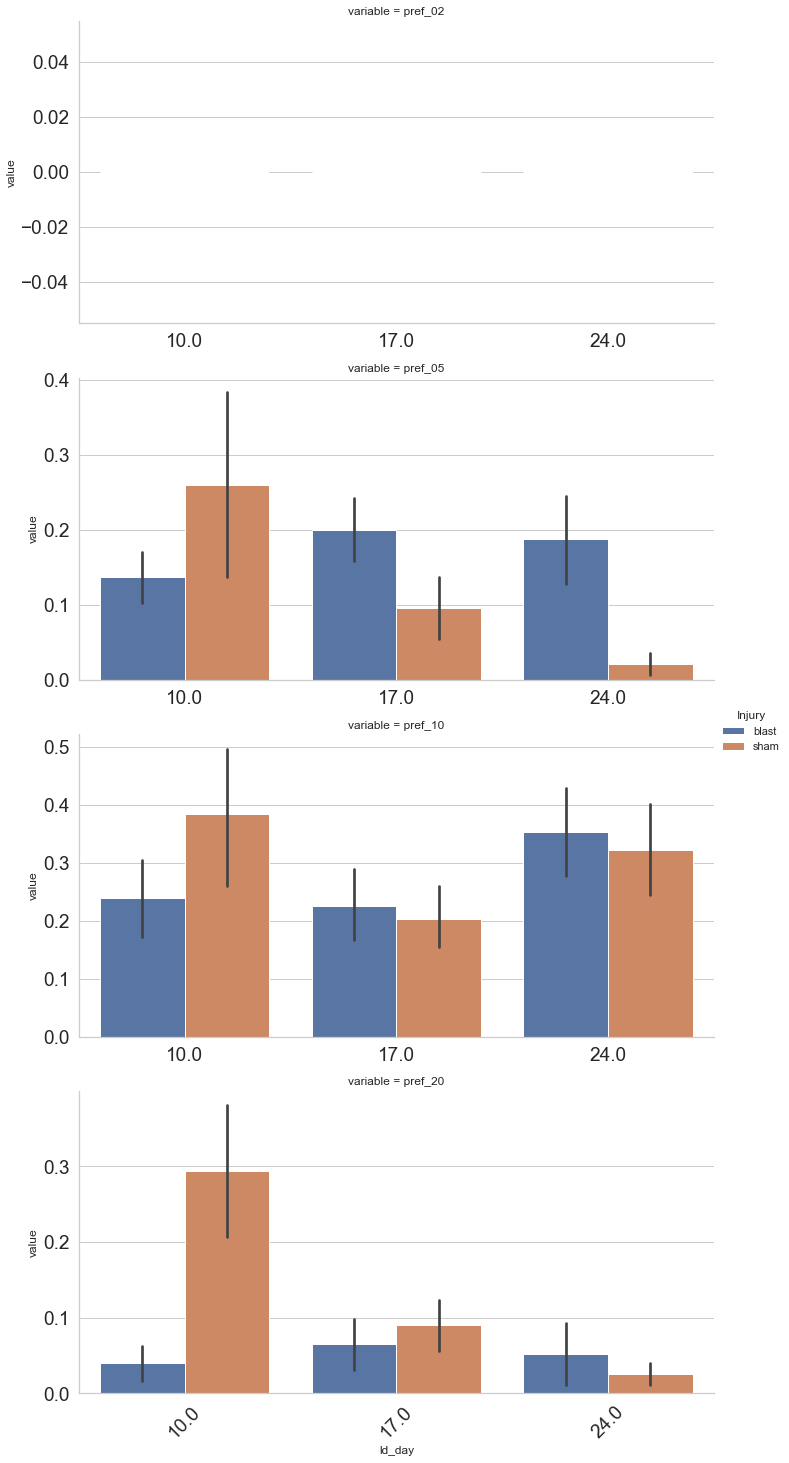

In [107]:
sns.set_theme(style="whitegrid")

plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 

plt.figure(figsize=(13,9))

d = preference_day[preference_day['round']=='etoh_r2.csv']
sns.catplot(x='ld_day', y='value', data=d,  kind='bar', 
            ci=68, hue='Injury', col='variable', col_wrap=1, height=5, aspect=2, sharey=False, sharex=False)

plt.xticks(rotation=45)

plt.show()

#### By ID

##### separate doses

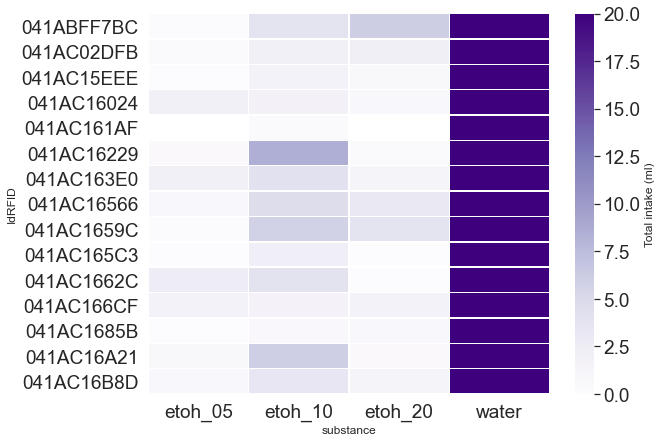

In [110]:
d = data_final_clean_3s_summary[data_final_clean_3s_summary['round']=='etoh_r2.csv']

groupby = d.groupby(['IdRFID', 'substance'])['intake_g_kg'].sum().reset_index()

groupby = groupby.pivot('IdRFID', 'substance', "intake_g_kg")
plt.figure(figsize=(9,7))
ax = sns.heatmap(groupby, cmap="Purples", vmin=0, vmax=20, linewidths=.5,
                     cbar_kws={'label': 'Total intake (ml)'})

#plt.xlabel('Bottle')
plt.show()


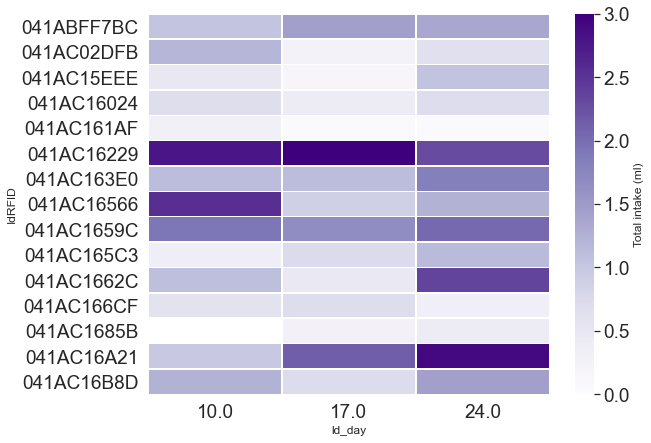

In [111]:
d = data_final_clean_3s_day[data_final_clean_3s_day['round']=='etoh_r2.csv']
d = d[d['substance']=='etoh_10']

groupby = d.groupby(['IdRFID', 'ld_day'])['intake_g_kg'].sum().reset_index()

groupby = groupby.pivot('IdRFID', 'ld_day', "intake_g_kg")
plt.figure(figsize=(9,7))
ax = sns.heatmap(groupby, cmap="Purples", vmin=0, vmax=3, linewidths=.5,
                     cbar_kws={'label': 'Total intake (ml)'})

#plt.xlabel('Bottle')
plt.show()


##### total intake

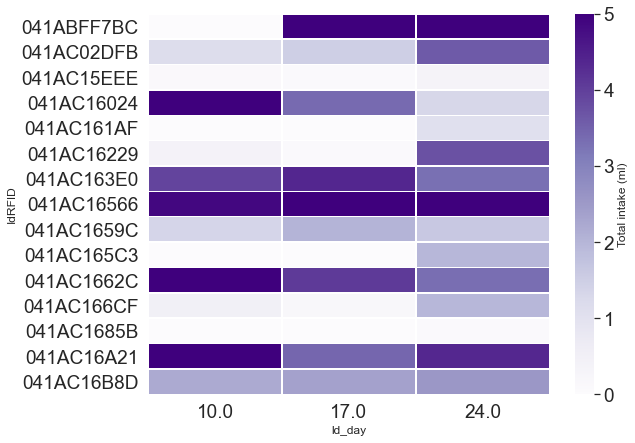

In [112]:
d = data_summary_day_gkg[data_summary_day_gkg['round']=='etoh_r1.csv']

groupby = d.groupby(['IdRFID', 'ld_day'])['total_alcohol_intake'].sum().reset_index()

groupby = groupby.pivot('IdRFID', 'ld_day', "total_alcohol_intake")
plt.figure(figsize=(9,7))
ax = sns.heatmap(groupby, cmap="Purples", vmin=0, vmax=5, linewidths=.5,
                     cbar_kws={'label': 'Total intake (ml)'})

#plt.xlabel('Bottle')
plt.show()


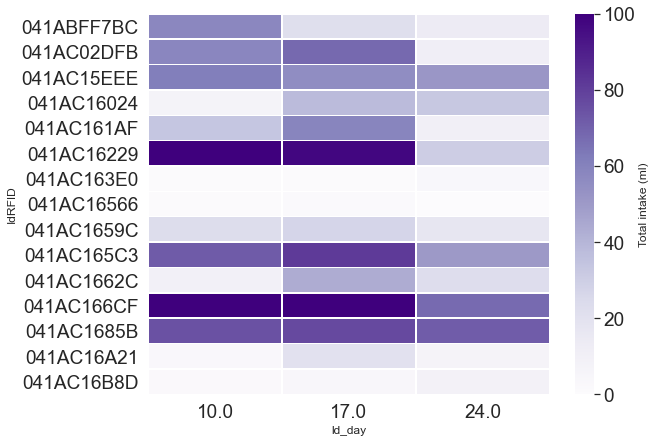

In [113]:
d = data_summary_day_gkg[data_summary_day_gkg['round']=='etoh_r1.csv']

groupby = d.groupby(['IdRFID', 'ld_day'])['water'].sum().reset_index()

groupby = groupby.pivot('IdRFID', 'ld_day', "water")
plt.figure(figsize=(9,7))
ax = sns.heatmap(groupby, cmap="Purples", vmin=0, vmax=100, linewidths=.5,
                     cbar_kws={'label': 'Total intake (ml)'})

#plt.xlabel('Bottle')
plt.show()

#####  Dose preference and alcohol to water preference

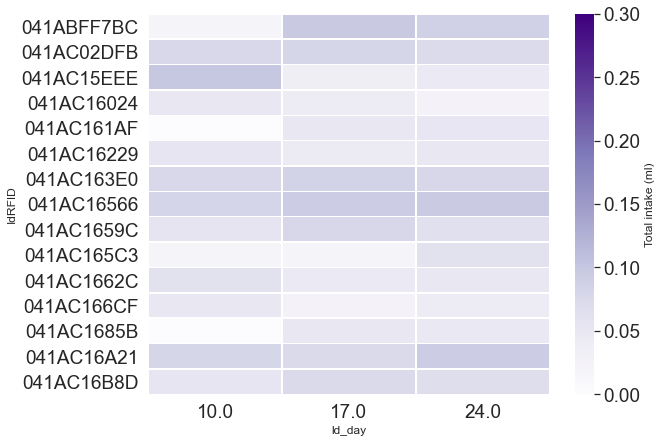

In [114]:
d = data_summary_day_vol[data_summary_day_vol['round']=='etoh_r1.csv']

groupby = d.groupby(['IdRFID', 'ld_day'])['PF'].sum().reset_index()

groupby = groupby.pivot('IdRFID', 'ld_day', "PF")
plt.figure(figsize=(9,7))
ax = sns.heatmap(groupby, cmap="Purples", vmin=0, vmax=.3, linewidths=.5,
                     cbar_kws={'label': 'Total intake (ml)'})

#plt.xlabel('Bottle')
plt.show()

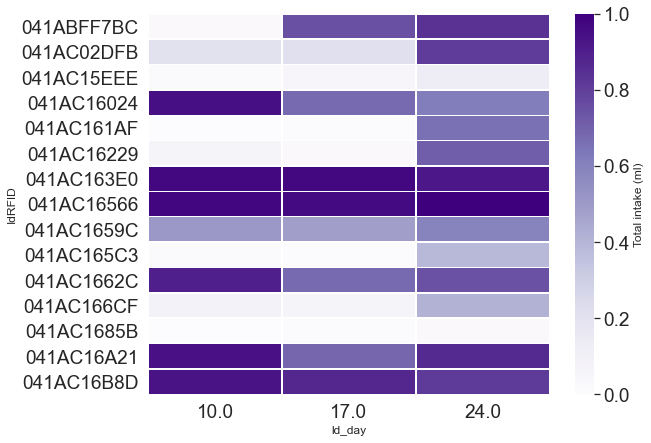

In [115]:
d = data_summary_day_vol[data_summary_day_vol['round']=='etoh_r1.csv']

groupby = d.groupby(['IdRFID', 'ld_day'])['overall_preference'].sum().reset_index()

groupby = groupby.pivot('IdRFID', 'ld_day', "overall_preference")
plt.figure(figsize=(9,7))
ax = sns.heatmap(groupby, cmap="Purples", vmin=0, vmax=1, linewidths=.5,
                     cbar_kws={'label': 'Total intake (ml)'})

#plt.xlabel('Bottle')
plt.show()

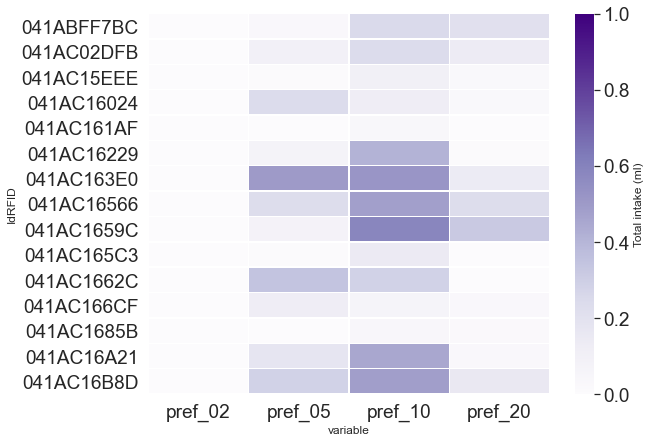

In [116]:
d = preference[preference['round']=='etoh_r2.csv']

groupby = d.groupby(['IdRFID', 'variable'])['value'].sum().reset_index()

groupby = groupby.pivot('IdRFID', 'variable', "value")
plt.figure(figsize=(9,7))
ax = sns.heatmap(groupby, cmap="Purples", vmin=0, vmax=1, linewidths=.5,
                     cbar_kws={'label': 'Total intake (ml)'})

#plt.xlabel('Bottle')
plt.show()

#### Raster

In [ ]:
d=data_final_clean_3s[data_final_clean_3s['Round']=='flavor']
d=d[d['day_count']<8]
colorCodes = ['C{}'.format(i) for i in range(6)]



param = 'sec_count_running'

data_1 = d[d['IdRFID'] == '041ABFF18E'][param].values
data_2 = d[d['IdRFID'] == '041ABFF5CF'][param].values
data_3 = d[d['IdRFID'] == '041A555C38'][param].values
data_4 = d[d['IdRFID'] == '041AC03717'][param].values
data_5 = d[d['IdRFID'] == '041AC00A9F'][param].values
data_6 = d[d['IdRFID'] == '041ABFE8D4'][param].values

data_array = np.array([data_1, data_2, data_3, data_4, data_5,
                      data_6])

# Draw a spike raster plot
plt.figure(figsize=(90,20))
params = {'axes.labelsize': 75,
          'axes.titlesize': 75}
plt.rc('xtick', labelsize=60) 
plt.rc('ytick', labelsize=60) 
plt.rcParams.update(params)
plt.yticks([0,1,2,3,4,5], 
           ['1', '2', '3', '4', '5', '6'])
plt.eventplot(data_array, color=colorCodes, linelengths = 0.3) 
plt.xlabel('Time (running second count)')
plt.ylabel('IdRFID')


plt.show()

## RFID

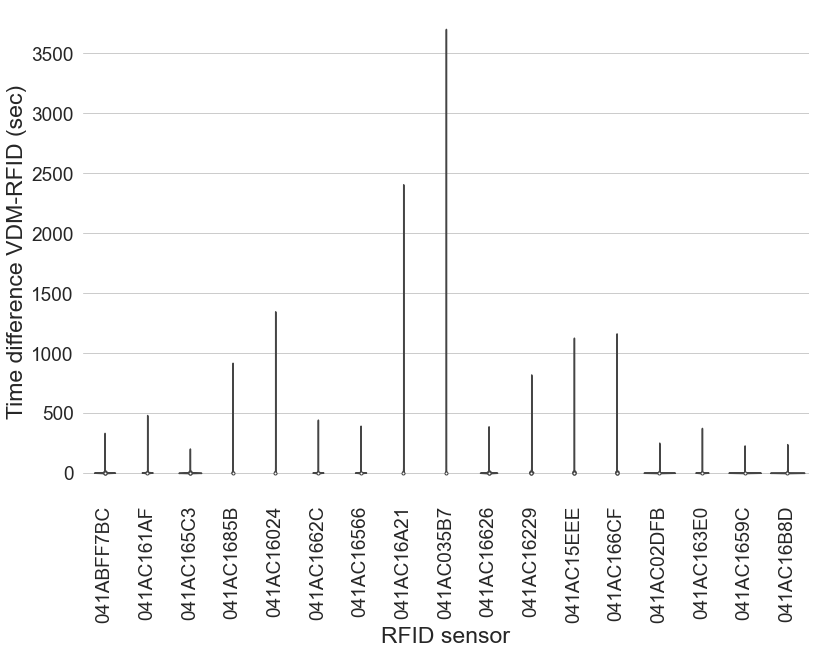

In [117]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(13,9))

plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 


sns.violinplot(x='IdRFID', y='eventDuration', data=data_RFID,  estimator='mean',
            ci=68)

plt.xticks(rotation=90)
sns.despine(bottom=True, left=True)

plt.xlabel('RFID sensor', fontsize=23)
plt.ylabel('Time difference VDM-RFID (sec)', fontsize=23)

plt.show()

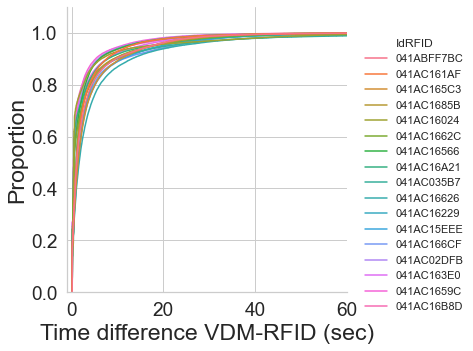

In [129]:
sns.displot(data=data_RFID, x="eventDuration", kind="ecdf", hue='IdRFID')
plt.xlabel('Time difference VDM-RFID (sec)')
plt.xlim(-1,60 )
plt.ylim(0,1.1)
plt.xlabel('Time difference VDM-RFID (sec)', fontsize=23)
plt.ylabel('Proportion', fontsize=23)
plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 
plt.show()

### Circadian rythms with RFID

In [131]:
RFID_gb_sum = data_RFID.groupby(['round', 'Timepoint', 'Cage', 'IdRFID', 'Animal',
                                        'Injury', 'Sex', 'Cage_N', 'ld_day', 
                                        'RFID_hour'])['eventDuration'].sum().reset_index(name='sum')
print(RFID_gb_sum.shape)

RFID_gb_count = data_RFID.groupby(['round', 'Timepoint', 'Cage', 'IdRFID', 'Animal',
                                        'Injury', 'Sex', 'Cage_N', 'ld_day', 
                                        'RFID_hour'])['eventDuration'].count().reset_index(name='count')
print(RFID_gb_count.shape)

RFID_gb = RFID_gb_sum.merge(RFID_gb_count)
print(RFID_gb.shape)

RFID_gb.head()

(16430, 11)
(16430, 11)
(16430, 12)


,round,Timepoint,Cage,IdRFID,Animal,Injury,Sex,Cage_N,ld_day,RFID_hour,sum,count
0,RFID_r1.csv,1m,1,041ABFF7BC,2154,sham,male,4,1,0,556.353,114
1,RFID_r1.csv,1m,1,041ABFF7BC,2154,sham,male,4,1,1,99.896,45
2,RFID_r1.csv,1m,1,041ABFF7BC,2154,sham,male,4,1,2,155.958,39
3,RFID_r1.csv,1m,1,041ABFF7BC,2154,sham,male,4,1,3,20.404,12
4,RFID_r1.csv,1m,1,041ABFF7BC,2154,sham,male,4,1,4,16.561,4


<AxesSubplot:xlabel='RFID_hour', ylabel='sum'>

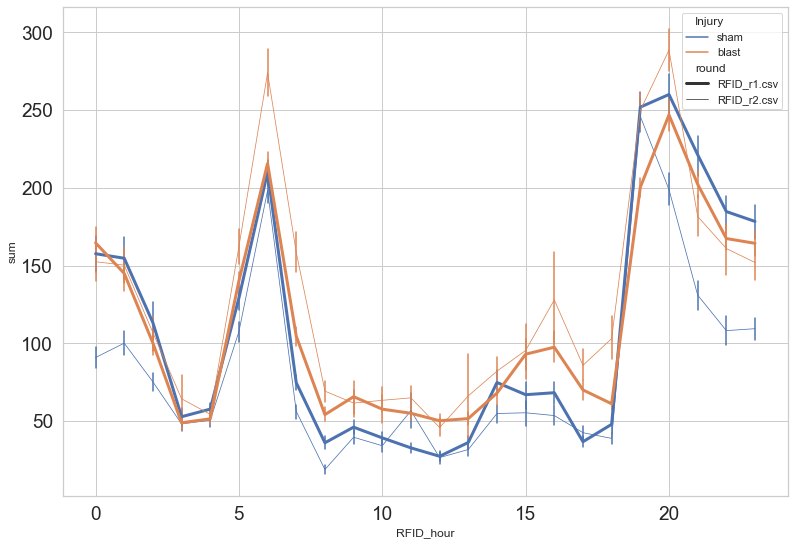

In [132]:
sns.set_theme(style="whitegrid")

plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 

plt.figure(figsize=(13,9))

d=RFID_gb[RFID_gb['Cage_N']==4]
sns.lineplot(x='RFID_hour', y='sum', data=d, hue='Injury', err_style="bars", ci=68, size='round')

### Social interaction?

In [135]:
data_final_clean = data_RFID

In [136]:
data_final_clean=data_final_clean[data_final_clean['Cage_N']==4]

In [137]:
data_final_clean = data_final_clean.sort_values(['unitLabel', 'RFID_datetime_start'])

#column for if next is same Id
def next_compare(a, b):
    if a == b:
        compare = 'same'
        
    if a != b:
        compare = 'diff'

    return compare

data_RFID_next = pd.DataFrame()

for unitlabel in data_final_clean['unitLabel'].unique():
    print(unitlabel)

    data_int = data_final_clean[data_final_clean['unitLabel'] == unitlabel].sort_values(['RFID_datetime_start'])
    data_int['RFID_datetime_start_next'] = data_int['RFID_datetime_start'].shift(-1)
    data_int['IdRFID_next'] = data_int['IdRFID'].shift(-1)
    
    data_int['IdRFID_diff_next'] = data_int.apply(lambda row: next_compare(row['IdRFID'], row['IdRFID_next']), axis=1)

    if data_RFID_next.empty:
        data_RFID_next = data_int
    else:
        data_RFID_next = pd.concat([data_RFID_next, data_int], axis=0)

data_RFID_next['time_diff_next'] = (pd.to_datetime(data_RFID_next['RFID_datetime_start_next'], infer_datetime_format=True) - \
                                    pd.to_datetime(data_RFID_next['RFID_datetime_end'], infer_datetime_format=True)).dt.seconds
        
data_RFID_next.head()

Spyder1.01
Spyder1.02
Spyder1.03
Spyder1.04
Spyder1.05
Spyder1.06
Spyder1.07
Spyder1.08
Spyder1.11
Spyder1.12
Spyder1.17
Spyder1.18
Spyder1.19
Spyder1.20
Spyder1.21
Spyder1.22
Spyder1.23
Spyder1.24


,Unnamed: 0,Round,Timepoint,Cage,IdRFID,Animal,Injury,Sex,Cage_N,unitLabel_drink,unitLabel,eventDuration,ld_cycle,ld_day,day,alcohol_on,after_weekend,RFID_hour,RFID_min,RFID_second,RFID_datetime_start,RFID_datetime_end,RFID_time_start,RFID_time_end,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running,RFID_file,22_11_11,22_11_18,22_11_25,22_12_02,23_01_06,23_01_13,23_01_20,23_01_27,round,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next
1,1,MPc1,1m,1,041ABFF7BC,2154,sham,male,4,water,Spyder1.01,5.366,dark,1,0,yes,0,18,9,34,2022-11-11 18:09:34.690032000,2022-11-11 18:09:40.056032000,18:09:34,18:09:40,1089,65374,-6,-351,-21086,Idspyder-22.11.11.csv,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,RFID_r1.csv,2022-11-11 18:10:32.770012799,041ABFF7BC,same,52.0
2,2,MPc1,1m,1,041ABFF7BC,2154,sham,male,4,water,Spyder1.01,5.264,dark,1,0,yes,0,18,10,32,2022-11-11 18:10:32.770012799,2022-11-11 18:10:38.034012799,18:10:32,18:10:38,1090,65432,-6,-350,-21028,Idspyder-22.11.11.csv,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,RFID_r1.csv,2022-11-11 18:10:39.149011200,041ABFF7BC,same,1.0
3,3,MPc1,1m,1,041ABFF7BC,2154,sham,male,4,water,Spyder1.01,0.075,dark,1,0,yes,0,18,10,39,2022-11-11 18:10:39.149011200,2022-11-11 18:10:39.224011200,18:10:39,18:10:39,1090,65439,-6,-350,-21021,Idspyder-22.11.11.csv,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,RFID_r1.csv,2022-11-11 18:10:48.400982400,041ABFF7BC,same,9.0
4,4,MPc1,1m,1,041ABFF7BC,2154,sham,male,4,water,Spyder1.01,0.075,dark,1,0,yes,0,18,10,48,2022-11-11 18:10:48.400982400,2022-11-11 18:10:48.475982400,18:10:48,18:10:48,1090,65448,-6,-350,-21012,Idspyder-22.11.11.csv,30.7,28.6,29.3,30.0,37.5,36.4,36.4,36.8,RFID_r1.csv,2022-11-11 18:10:55.577971200,041AC165C3,diff,7.0
29636,29636,MPc1,1m,1,041AC165C3,2156,sham,male,4,water,Spyder1.01,2.072,dark,1,0,yes,0,18,10,55,2022-11-11 18:10:55.577971200,2022-11-11 18:10:57.649971200,18:10:55,18:10:57,1090,65455,-6,-350,-21005,Idspyder-22.11.11.csv,29.6,28.8,28.5,29.5,35.6,33.6,34.4,34.4,RFID_r1.csv,2022-11-11 18:10:58.664006400,041AC165C3,same,1.0


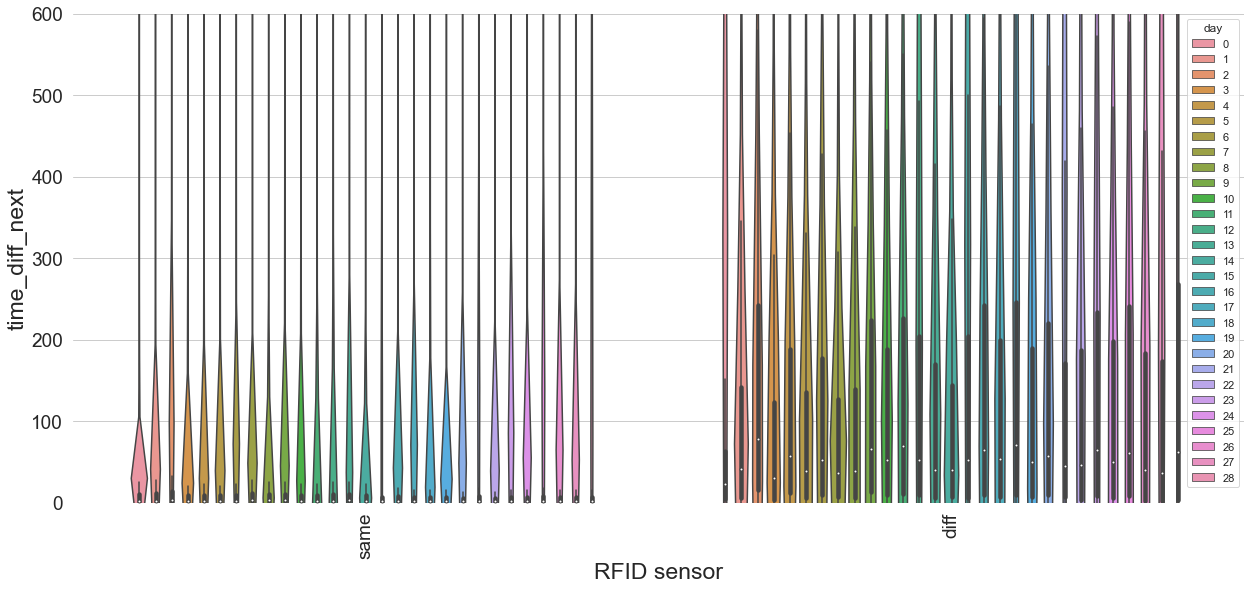

In [139]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(21,9))

plt.rc('xtick', labelsize=19) 
plt.rc('ytick', labelsize=19) 


sns.violinplot(x='IdRFID_diff_next', y='time_diff_next', data=data_RFID_next,  estimator='mean',
            ci=68, hue='day')

plt.xticks(rotation=90)
sns.despine(bottom=True, left=True)
plt.ylim(0,600)
plt.xlabel('RFID sensor', fontsize=23)
plt.ylabel('time_diff_next', fontsize=23)

plt.show()

### Summarize and combine with AM behavior

In [ ]:
path_behav = '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID/meta/RFID_VDM_behavior.xlsx'

data_behav = pd.read_excel(path_behav)
data_behav = pd.DataFrame(data = data_behav)

data_behav.head()

In [ ]:
sns.catplot(x='Sex', y='Entries', data=data_behav[data_behav['Behavior']=='EZM'],  kind='bar', 
            ci=68, height=5, aspect=1, hue='Session')

In [ ]:
sns.lmplot(x='Dominance', y='Latency', data=data_behav[data_behav['Behavior']=='OFB'], hue='Session')

In [ ]:
data_gbmean_beh = data_gbmean.merge(data_behav, on=['IdRFID'])

data_gbmean_beh.head()

In [ ]:
d=data_gbmean_beh[data_gbmean_beh['Behavior']=='EZM']
d=d[d['Session']==1]

sns.lmplot(x='Dominance', y='value', data=d[d['substance']!='water'], col='substance')